# A3: Solving nonlinear equations in 1d

- Complete the following and submit to Canvas before Sept 24 11:59PM,
- Late work will recieve 0%,
- Each assignment is worth the same, 
- Please get in contact with the instructor in plenty of time if you need help,
- Before submitting your work, make sure to check everything runs as expected. Click **Kernel > Restart Kernel and Run All Cells**.
- Feel free to add more cells to experiment or test your answers,
- I encourage you to discuss the course material and assignment questions with your classmates. However, unless otherwise explicitly stated on the assignment, you must complete and write up your solutions on your own,
- The use of GenAI is prohibited as outlined in the course syllabus. If I suspect you of cheating, you may be asked to complete a written or oral exam on the content of this assignment,
- ✍ indicates a question where a mathematical proof is required
- 💻 indicates a question where numerical experiments are required 

<div class="alert alert-info">
Enter your name here: YOUR NAME HERE  

Approximate time spent on this assignment: .......
</div>

<div class="alert alert-block alert-danger"> 
    ⚠ Do not edit the following cell. You may find some of these functions useful
</div>

In [ ]:
using Plots
using LaTeXStrings

function simple_iteration( g, x1, N=100, tol=1e-10 )
    x = [ x1 ]
    for n in 2:N
        push!( x, g(x[n-1]) )
        if (abs(g(x[end]) - x[end]) < tol)
            break
        end
    end
    return x
end

# asymptotic rate of convergence
function μ( x, ξ, α=1 )
    return @. abs( x[2:end] - ξ ) / ( abs(x[1:end-1] - ξ )^α );
end 

# some useful functions
id = x -> x;
g = x -> exp(-x);
g_prime = x -> -exp(-x);
h = x -> log(abs(1/x)); 
h_prime = x -> -1/x;

Ω = simple_iteration( g, 0.56, 100, 1e-15 )[end];
println( "Ω = ", Ω, " (to 15 significant digits)" ) 


Ω = 0.5671432904097845 (to 15 significant digits)


## A. Lambert $W$ function

**[50pts]** In A1, you were asked to prove that the *Lambert W function* (also called the *product-log function*) is a well-defined function $W : [0,\infty) \to [0,\infty)$ satisfying $W(a) e^{W(a)} = a$. Define $\Omega := W(1)$. Last time, essentially by the change of sign theorem, you showed that $\Omega \in [0.56, 0.58]$. 

1. ✍ Show that $\Omega$ is a fixed point of $g$ and $h$ as defined by  

\begin{align}
    g(x) = e^{-x}, \qquad h(x) = \log \left|\frac{1}{x}\right|
\end{align}

2. 💻 Show numerically that $x_{n+1} = g(x_n)$ converges and $y_{n+1} = h(y_n)$ diverges for a few different choices of $x_1$ and $y_1$.
   
We will show that $\Omega$ is a stable fixed point of $g$ but an unstable fixed point of $h$.

3. ✍ Show that $g:[\frac{1}{e}, 1]\to[\frac{1}{e},1]$ with $|g'| < 1$, 
4. ✍ Explain why this means that the iteration $x_{n+1} = g(x_n)$ converges for all $x_1 \in [\frac{1}{e}, 1]$,
5. ✍ Now fix $x_1 \in \mathbb R$. Show that the sequence $(x_n)$ is eventually contained in $[0,1]$ and that $g : [0,1] \to [\frac{1}{e}, 1]$. Explain why this means that $(x_n)$ converges for all $x_1 \in \mathbb R$,
6. ✍ What is the order of convergence of this method? 
7. 💻 Confirm this numerically. 
8. ✍ Show that $(y_n)$ doesn't converge to $\Omega$ for any choice of $y_1 \not= \Omega$


## B. Bisection Method

**[50pts]** Suppose that $f \colon [a,b] \to \mathbb R$ is continuous with $f(a) f(b) \leq 0$. By the change of sign theorem, there exists $\xi \in [a,b]$ for which $f(\xi) = 0$. The bisection method can be described by the following pseudocode:

<div style="font-family:monospace;">
<pre>
    INPUT:  f    : function
            a, b : interval on which f is defined     
            tol  : tolerance
            N    : maximum number of iterations
    OUTPUT: x    : such that |f(x)| < tol
    for n in 1:N
        x[n] = midpoint of a and b
        if ( |f(c)| < tol ) 
            println("approximate root found after n iterations")
            OUTPUT: x[n]
        else if ( f changes sign on [a,c] )                                    
            b = x[n]; 
        else 
            a = x[n];      
    end
    println( "root not found" )
    OUTPUT: x[N] 
</pre>
</div>

1. 💻 Implement this method in the following cell

x = bisection(f, 0.0, 1.0) = 0.5


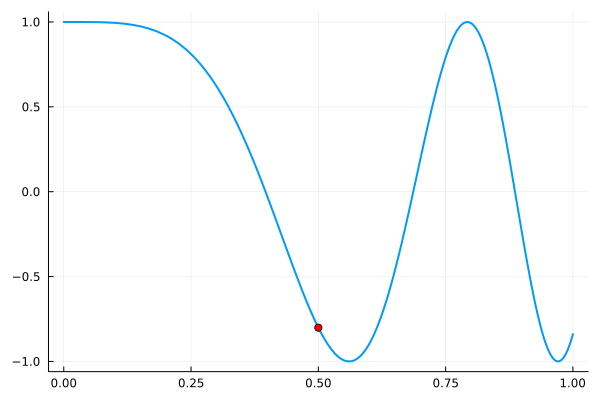

In [ ]:
function bisection( f, a, b, tol=1e-10, N=100)
    
    # insert your code here







    return (a+b)/2

end

f = x -> cos( 10 * x^2 ); 
@show x = bisection( f, 0.0, 1.0 );

plot( f , 0, 1, legend=false, lw = 2)
scatter!( [x], [f(x)], color="red" )

2. ✍ Suppose there exists a unique root $\xi \in [a,b]$. What is the order of convergence of the bisection method? What is the asymptotic error constant?
3. ✍💻 Plot $f(x) = (1+x^2) \mathrm{sign}(x - \xi)$ and explain what happens when you apply the bisection method to $f$.
4. 💻 Use the bisection method to approximate $\Omega = W(1)$.
5. 💻 Use the bisection method to approximate $\sqrt{2}$.